In [2]:
import numpy as np

import matplotlib.pyplot as plt

def f(x):
    return 0.3*x**2 + 0.5*x - 1

x_s = -1
x_e =  4
x_values = np.linspace(x_s,x_e,50)
y_values = f(x_values)


x_noise = np.linspace(x_s,x_e,50)
y_noise = y_values + np.random.normal(0,1,50)


fig,ax = plt.subplots()
ax.plot(x_values,y_values,label='polynomial')
ax.scatter(x_noise,y_noise,label='Raw data')
ax.legend();

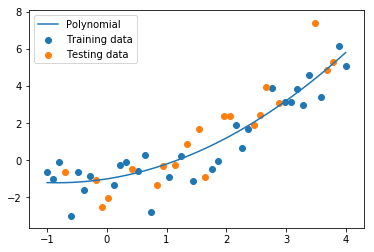

In [3]:
Raw_data = np.column_stack((x_noise,y_noise))

n_rows = len(Raw_data)
np.random.shuffle(Raw_data)

train_percent  = int(0.6*n_rows)
split_data = np.split(Raw_data,[0,train_percent])
train_data = split_data[1]
test_data  = split_data[2]


fig,ax = plt.subplots()
ax.plot(x_values,y_values,label='Polynomial')
ax.scatter(train_data[:,0],train_data[:,1],label='Training data')
ax.scatter(test_data[:,0],test_data[:,1],label='Testing data');
ax.legend();

In [5]:
import sympy as sp
from sympy import simplify
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')


def hyp(x,a,b,c):
    return a + b*x +c*x**2

def cost(x,a,b,c,y):
    cost = np.sum((hyp(x,a,b,c) - y)**2)/len(train_data)
    return cost

# d = cost(train_data[:,0],a,b,c,train_data[:,1])
error_func = sp.simplify(cost(train_data[:,0],a,b,c,train_data[:,1]))
# print(error_func)

def derivative(a,b,c):
    df_da = sp.diff(error_func,a)
    df_db = sp.diff(error_func,b)
    df_dc = sp.diff(error_func,c)
#     df_dd = sp.diff(error_func,d)
    return df_da,df_db,df_dc

df_da,df_db,df_dc = derivative(a,b,c)
a_old = 0.1
b_old = 0.1
c_old = 0.1
# d_old = 0.1

# print(df_da)


    
for i in range(1000):
    df_da2 = df_da.subs(a,a_old).subs(b,b_old).subs(c,c_old)
    df_db2 = df_db.subs(a,a_old).subs(b,b_old).subs(c,c_old)   
    df_dc2 = df_dc.subs(a,a_old).subs(b,b_old).subs(c,c_old).subs(d,d_old)
    df_dd2 = df_dd.subs(a,a_old).subs(b,b_old).subs(c,c_old).subs(d,d_old)
#     print(df_da2)
        
    a_new = a_old - df_da2*0.001
    b_new = b_old - df_db2*0.001
    c_new = c_old - df_dc2*0.001
    d_new = d_old - df_dd2*0.001

        
    e1 = a_new-a_old
    e2 = b_new-b_old
    e3 = c_new-c_old
    e4 = d_new-d_old
        
    a_old = a_new
    b_old = b_new
    c_old = c_new
    d_old = d_new
        
    if e1==10**-2 and e2==10**-2 and e3==10**-2 and e4==10**-2:
        break;
            
print(d_new)        
    




0.0732057671804427


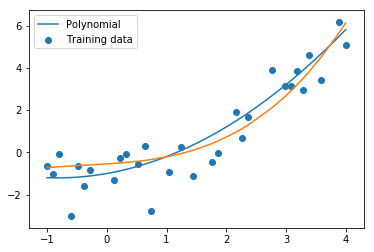

In [8]:
# from numpy import Polynomial

p = np.poly1d([d_new,c_new,b_new,a_new])
func2 = p(train_data[:,0])


fig,ax = plt.subplots()
ax.plot(x_values,y_values,label='Polynomial')
ax.scatter(train_data[:,0],train_data[:,1],label='Training data')
ax.plot(np.sort(train_data[:,0]),np.sort(func2))
ax.legend();


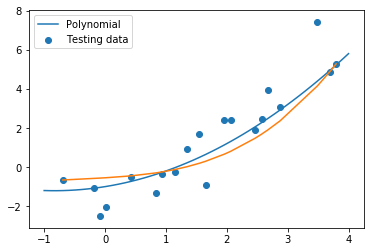

In [10]:
func3 = p(test_data[:,0])
fig,ax = plt.subplots()
ax.plot(x_values,y_values,label='Polynomial')
ax.scatter(test_data[:,0],test_data[:,1],label='Testing data')
ax.plot(np.sort(test_data[:,0]),np.sort(func3))
ax.legend();